In [1]:
import pandas as pd
import scipy as scp
from Identifiers import MeasuresManager as mm
import copy
from IPython.display import clear_output
from UIHelpers import UIDrawer as uid

import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display


# from scipy.stats import spearmanr
DATA_DIR = "data/"

In [2]:
data = pd.read_csv(DATA_DIR + 'seps_utf.csv', ';')
data = data[data.columns.drop(list(data.filter(regex='Unnamed')))]
data = data.drop(['Оценка', 'Группа'], 1)
data = data.dropna()
measures_manager = mm.MeasuresManager(data)

measures_manager.data_frame

,Содержание дисциплины соответствовало заявленному в программе дисциплины,Место дисциплины в программе обучения обосновано,Учебная нагрузка дисциплины посильная,Уровень нагрузки в ходе обучения равномерный,Занятия проводились согласно расписанию,Доступ к материалам дисциплины предоставлялся вовремя,О заменах и переносах (при наличии таковых) сообщалось заранее в доступной форме,Перед изучением дисциплины [были ли у Вас соответствующие теоретические знания],Перед изучением дисциплины [был ли у Вас соответствующий практический опыт],"Оцените, пожалуйста, [приблизительный уровень Вашего присутствия на занятиях (в %)]",...,При изложении материала прослеживались связи [между этой и другими дисциплинами программы обучения],Преподаватель динамично реагировал на вопросы и потребности студентов,Готовы ли Вы охарактеризовать поведение уравновешенным и отношение к студентам объективным [говоря о преподавателе],Методы оценивания были понятны и обоснованы?,Вы получали вовремя результаты оценивания?,Давал ли преподаватель полезную обратную связь по результатам оценивания?,Методические указания содержали полезные сведения,Требуемый объем работ,Преподаватель эффективно помогал в решении возникавших проблем,Практические/лабораторные задания Вы выполняли
0,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Нет,Нет,0-30,...,"Да, регулярно",Да,Да,Да,Да,Да,"Однозначно, да",посильный,Всегда,с небольшой помощью
1,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Нет,Нет,90-100,...,Весьма эпизодически,Да,Да,Да,Да,Да,"Однозначно, да",посильный,Всегда,самостоятельно
2,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Не определился,Полностью согласен,Полностью согласен,Да,Нет,60-74,...,Весьма эпизодически,Да,Нет,Да,Да,Да,Некоторые рекомендации были полезны,посильный,Иногда,самостоятельно
3,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Да,Да,31-59,...,"Да, регулярно",Да,Да,Да,Да,Я не спрашивал,"Однозначно, да",посильный,Всегда,с небольшой помощью
4,Полностью согласен,Согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Да,Да,75-89,...,"Да, регулярно",Да,Да,Да,Да,Иногда баллы за электронные лабораторные работ...,"Однозначно, да",посильный,Всегда,с небольшой помощью
5,Согласен,Не определился,Согласен,Согласен,Согласен,Согласен,Согласен,Нет,Нет,75-89,...,Весьма эпизодически,Да,Да,Да,Да,Да,Некоторые рекомендации были полезны,посильный,Всегда,с небольшой помощью
6,Полностью согласен,Полностью согласен,Полностью согласен,Не определился,Полностью согласен,Полностью согласен,Согласен,Нет,Нет,0-30,...,"Да, регулярно",Да,Да,Да,Да,Да,"Однозначно, да",посильный,Всегда,с небольшой помощью
7,Полностью согласен,Не определился,Согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Да,Нет,90-100,...,Весьма эпизодически,Да,Да,Да,Да,Да,"Однозначно, да",посильный,Всегда,как команда
8,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Да,Нет,31-59,...,Весьма эпизодически,Да,Да,Да,Да,Да,"Однозначно, да",посильный,Всегда,самостоятельно
9,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Да,Нет,31-59,...,Весьма эпизодически,Да,Да,Да,Да,Да,Некоторые рекомендации были полезны,посильный,Всегда,самостоятельно


In [4]:
measures_manager.get_aggregated_signs()

{'Содержание дисциплины соответствовало заявленному в программе дисциплины': {'Полностью согласен': 38,
  'Согласен': 12,
  'Не определился': 1},
 'Место дисциплины в программе обучения обосновано': {'Полностью согласен': 31,
  'Согласен': 13,
  'Не определился': 7},
 'Учебная нагрузка дисциплины посильная': {'Полностью согласен': 38,
  'Согласен': 11,
  'Не определился': 1,
  'Не согласен': 1},
 'Уровень нагрузки в ходе обучения равномерный': {'Полностью согласен': 41,
  'Согласен': 8,
  'Не определился': 2},
 'Занятия проводились согласно расписанию': {'Полностью согласен': 42,
  'Согласен': 6,
  'Не определился': 3},
 'Доступ к материалам дисциплины предоставлялся вовремя': {'Полностью согласен': 43,
  'Согласен': 8},
 'О заменах и переносах (при наличии таковых) сообщалось заранее в доступной форме': {'Полностью согласен': 44,
  'Согласен': 5,
  'Не определился': 2},
 'Перед изучением дисциплины [были ли у Вас соответствующие теоретические знания]': {'Нет': 29,
  'Да': 22},
 'Перед

In [5]:
measures_manager.get_aggregated_signs(True)

{'Содержание дисциплины соответствовало заявленному в программе дисциплины': {'Полностью согласен': 38,
  'Согласен': 12,
  'Не определился': 1,
  'type': 'Nominal'},
 'Место дисциплины в программе обучения обосновано': {'Полностью согласен': 31,
  'Согласен': 13,
  'Не определился': 7,
  'type': 'Nominal'},
 'Учебная нагрузка дисциплины посильная': {'Полностью согласен': 38,
  'Согласен': 11,
  'Не определился': 1,
  'Не согласен': 1,
  'type': 'Nominal'},
 'Уровень нагрузки в ходе обучения равномерный': {'Полностью согласен': 41,
  'Согласен': 8,
  'Не определился': 2,
  'type': 'Nominal'},
 'Занятия проводились согласно расписанию': {'Полностью согласен': 42,
  'Согласен': 6,
  'Не определился': 3,
  'type': 'Nominal'},
 'Доступ к материалам дисциплины предоставлялся вовремя': {'Полностью согласен': 43,
  'Согласен': 8,
  'type': 'Nominal'},
 'О заменах и переносах (при наличии таковых) сообщалось заранее в доступной форме': {'Полностью согласен': 44,
  'Согласен': 5,
  'Не определи

In [5]:
# Experiments with widgets. Ignore this cell
from ipywidgets import widgets
from IPython.display import display

text_wid = widgets.Text()
# display(text_wid)

def text_handler(sender):
    print(text_wid.value)

# text_wid.on_submit(text_handler)

Dropdown(description='Выберите признак: ', index=1, layout=Layout(width='100%'), options=('Содержание дисципли…

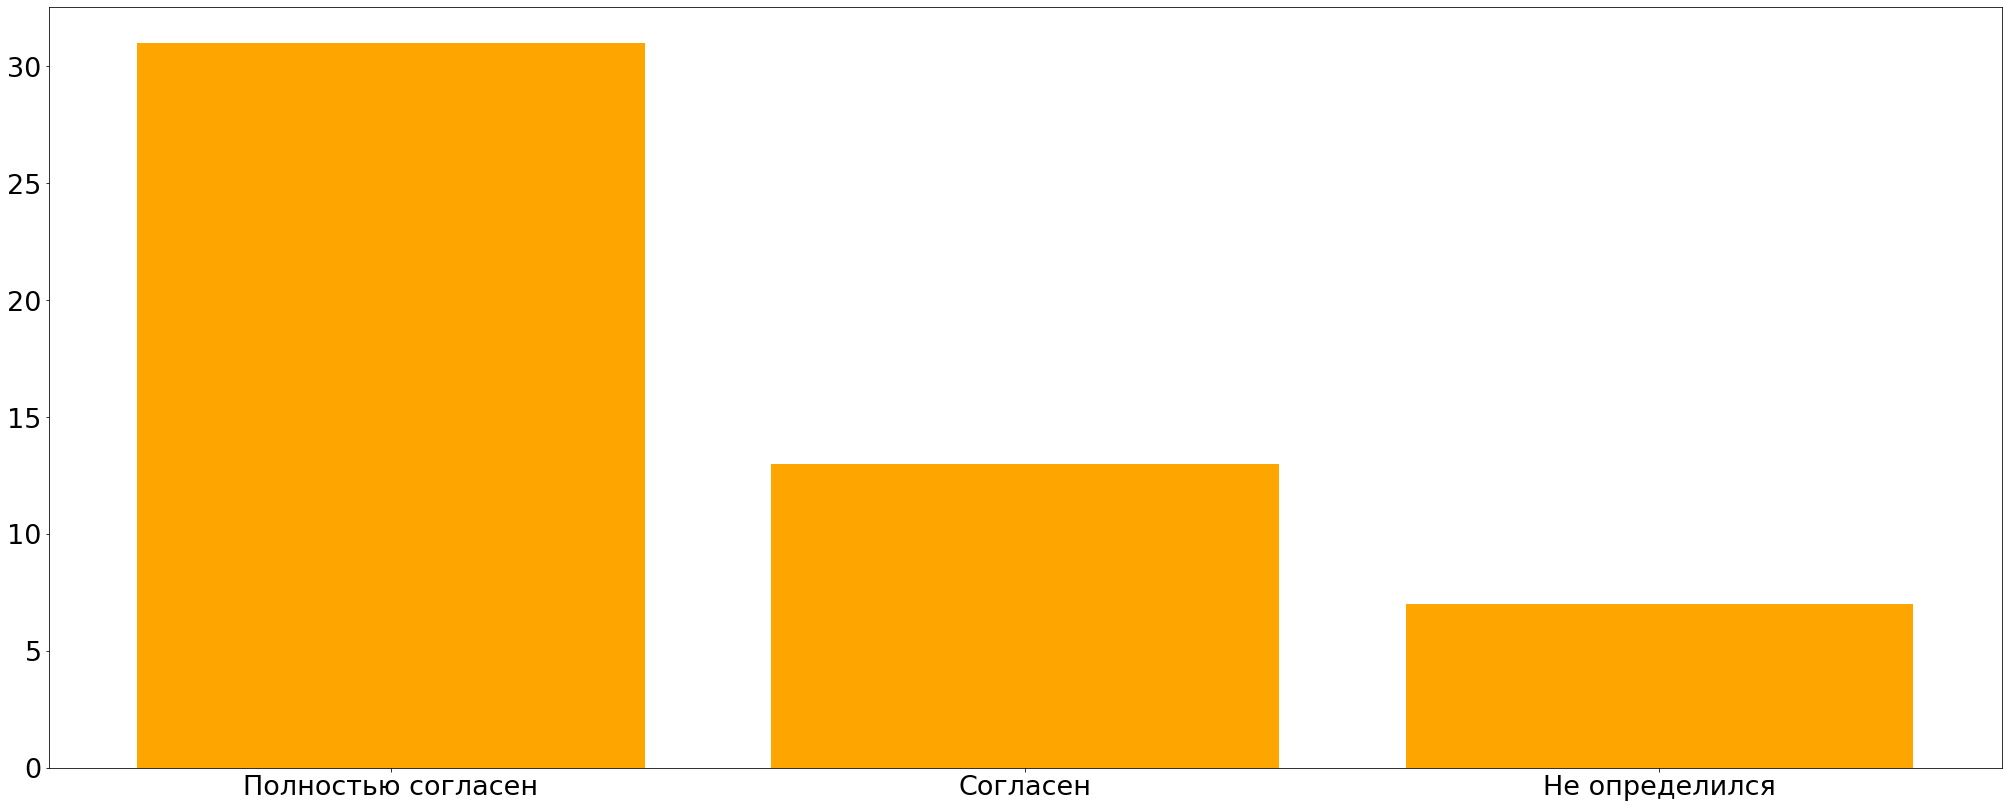

In [6]:
signs_dropdown = widgets.Dropdown(
    options=measures_manager.data_frame.columns,
    value=None,
    description='Выберите признак: ',
    disabled=False,
    style={'description_width': 'initial', 'width': '500px'},
    layout={'width':'100%'}
)


new_val = "init"
# copy_data_signs = copy.deepcopy(data_signs)
# copy_data_signs = copy_data_signs.map(lambda x: del x['type'])
drawer = uid.UIDrawer(measures_manager)
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output(wait=True)
        signs_dropdown.observe(on_change)
        display(signs_dropdown)
        drawer.display_sign(change['new'])

signs_dropdown.observe(on_change)
display(signs_dropdown)
print(new_val)


In [66]:
print(new_val)

Вы удовлетворены своим прогрессом в дисциплине?


In [9]:
# Test (WIP)
from IPython.core.display import display, HTML
from UIHelpers import UIDrawer as dr

drw = dr.UIDrawer(measures_manager)
# drw.display_info_for_nominal_2("test")
test_str = "test<br>test"
display(HTML(f'<h2> Mode: {test_str} </h1>'))

